### PACKAGES 

In [1]:
%matplotlib inline
from matplotlib import rcParams

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=Ev8YbxPu_bQ
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
<font color='red'>
    It is a technic of unsupervised learning used when you have unlabeled data (i.e., y suppose to be categorical) 
2. What are the main steps in the standard process of clustering?
<font color='red'>
    You begin by dividing data into groups ann than comparing similarity between data points. Based on similarity data point are assigned to the same group or to a new group util reaching a stabiity point (i.e., data points are well assigned to different groups)  
3. What is the Silhouette coefficient?
<font color='red'>
    It is a way of quantifying cluster overlapping 
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?
<font color='red'>
     Extrinsic Measures which require ground truth labels and Intrinsic Measures that does not require ground truth labels. 

*Answer here*

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [117]:
# code here
df = pd.read_csv('../data/data/bank-full.csv', sep=';')

Print a summary of the data as well as the first 5 rows.

In [118]:
# code here
print(df.shape)
display(df.head(5))
display(df.describe())

(45211, 17)


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [119]:
df_info = pd.DataFrame(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [120]:
# creating a list of categorical feature names 
cat_var_list = df.dtypes[df.dtypes == 'object'].index.to_list()
cat_var_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [121]:
# creating new datarframe with numerical vvariables only 
df.drop(columns=cat_var_list, inplace=True)

# droping day column 
df.drop(columns='day', inplace=True)

In [122]:
# looking for missing values 
df.isna().sum()

age         0
balance     0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [123]:
# creating a normalize min max fonction 
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

# calling minmax_norm fonction to normalize X
df_norm = minmax_norm(df)

In [124]:
df_norm.describe()

age       balance      duration      campaign         pdays  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean       0.297873      0.085171      0.052494      0.028449      0.047245   
std        0.137906      0.027643      0.052364      0.049968      0.114827   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.194805      0.073457      0.020943      0.000000      0.000000   
50%        0.272727      0.076871      0.036600      0.016129      0.000000   
75%        0.389610      0.085768      0.064864      0.032258      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           previous  
count  45211.000000  
mean       0.002110  
std        0.008376  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

Plot histograms of features

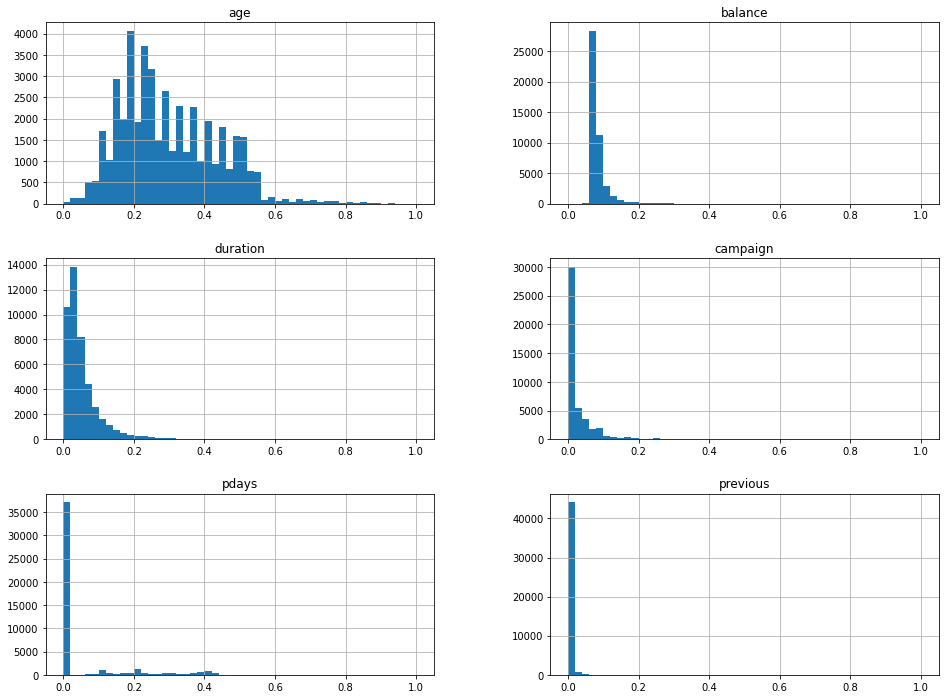

In [125]:
# plotting features 
rcParams['figure.figsize'] = 16,12
plots = df_norm.hist(bins=50)

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


<font color='red'>
- 1. is the location of the center of the cluster  
- 2. getting the position of all points of a single cluster and calculating the mean of distances  
- 3. no

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [143]:
# peforming a clustering of the data in df_norm into 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

Print the centroids obtained

In [144]:
# Creating centroids variable 
kmeans.cluster_centers_

array([[4.03294255e+01, 4.06516532e+02, 2.54372883e+02, 2.79676284e+00,
        3.99933483e+01, 5.52451429e-01],
       [4.32100184e+01, 3.28432198e+03, 2.72881226e+02, 2.61402015e+00,
        4.15521499e+01, 6.95331347e-01],
       [4.45974843e+01, 2.14881855e+04, 2.58018868e+02, 2.67295597e+00,
        3.31729560e+01, 5.62893082e-01],
       [4.34496258e+01, 8.82271618e+03, 2.77317789e+02, 2.69314911e+00,
        4.05561313e+01, 7.01784686e-01],
       [5.30714286e+01, 5.78300357e+04, 2.51357143e+02, 3.46428571e+00,
        2.03928571e+01, 2.14285714e-01]])

Print the cluster labels assigned to each point

In [145]:
# cluster labels 
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int32)

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [178]:
# PCA and kmeans 
pca = PCA(n_components=2)
components = pca.fit_transform(df_norm)
kmeans = KMeans(n_clusters=5, random_state=0).fit(components)
labels = kmeans.predict(components)
centers = np.array(kmeans.cluster_centers_)

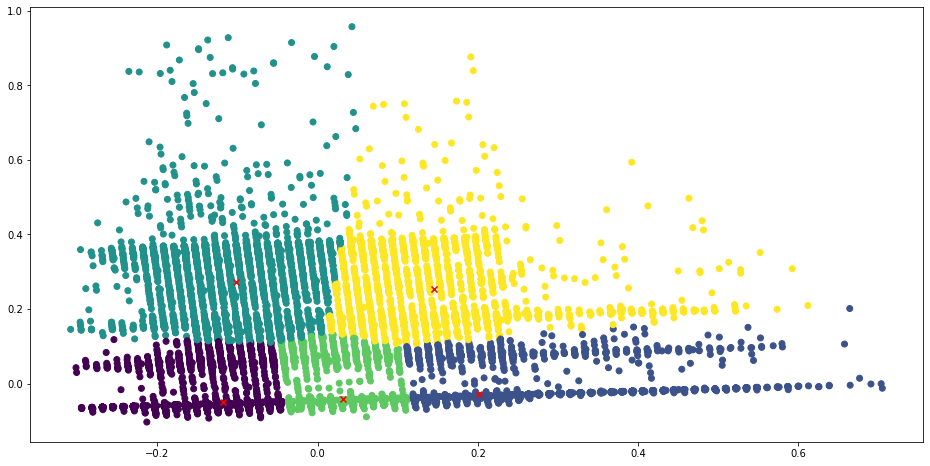

In [181]:
# Creating a scatterplot to visualize the clustered points 
plt.figure(figsize=(16,8))
plt.scatter(components[:,0], components[:,1], c= labels)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [185]:
# Inertia score
kmeans.inertia_

254.1602133526344

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [186]:
# Silhoutte score 
labels_kmeans = kmeans.labels_
silhouette_score(df_norm, labels_kmeans, metric='euclidean')

0.3400915792619434

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [ ]:
# code here

What is the optimal number of clusters that you obtained?

*Answer here*

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://www.statisticshowto.datasciencecentral.com/hierarchical-clustering/
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [ ]:
# code here

How many clusters did you find?

*Answer here*

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [ ]:
# code here

### Application: clustering images (Optional)

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
# install skimage

#Code here

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
# code here

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

In [ ]:
# code here

For each of the data points we also have access to their real labels (using *digits.target*). This means we can verify if the clustering algorithm split the data in such a way as to predict the original classes. 

Note that the labels of the discovered clusters may not directly match the initial labels in the dataset (they could be permuted). Write code to match each learned cluster label with the true labels of the data found in them.

In [ ]:
# code here

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [ ]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [ ]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [ ]:
# code here